In [4]:
import pandas as pd
import numpy as np
import mlmodule as ml
import visualization as vs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,  classification_report
import seaborn as sns

#Загрузка датасета
file_path = 'Sales.csv'
data = ml.load_data(file_path)

Данные успешно загружены. Размер: (113036, 18)
Пропущенные значения по столбцам:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64
Типы данных по столбцам:
Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64

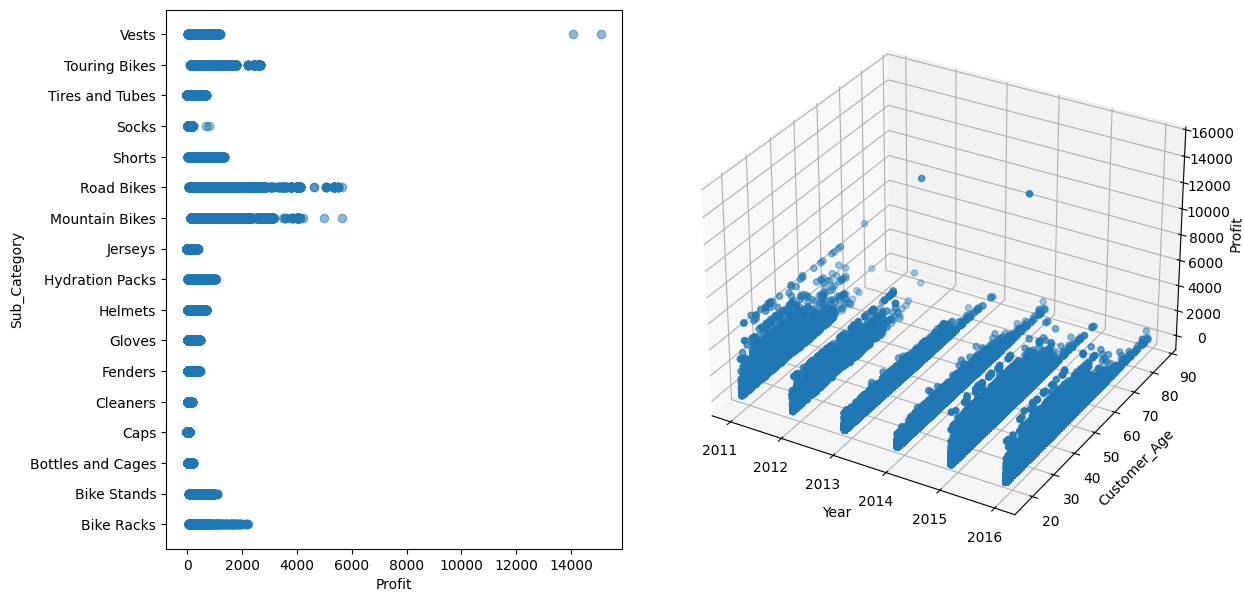

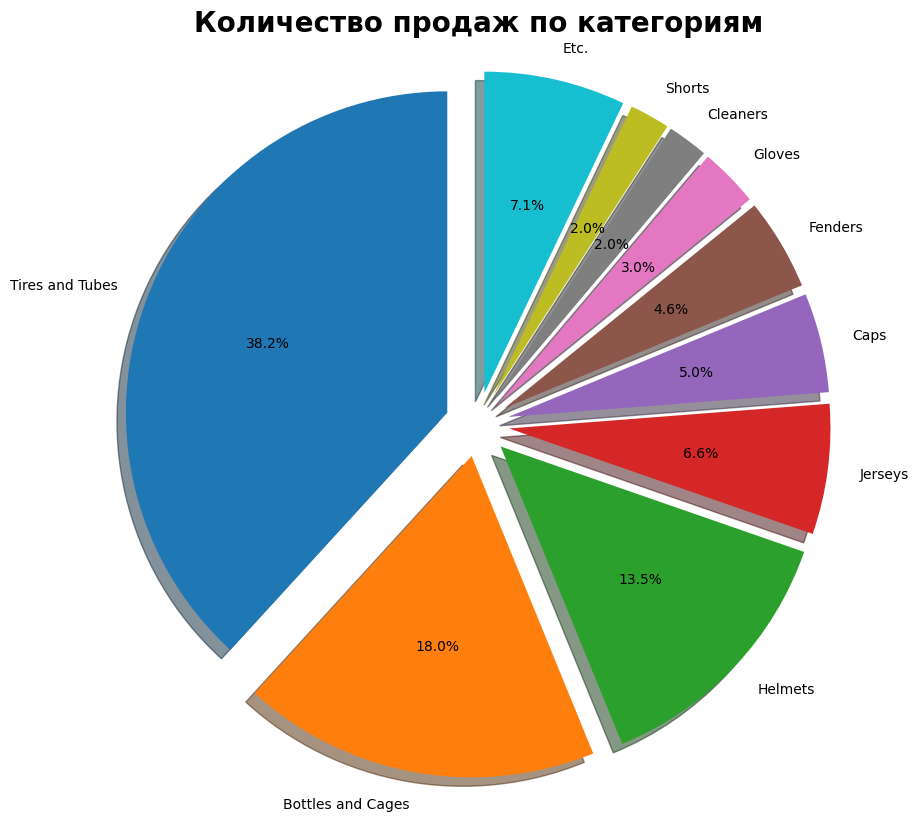

In [5]:
#Визуализация 1
x1 = 'Profit'
y1 = 'Sub_Category'

#Визуализация 2
x2 = 'Year'
y2 = 'Customer_Age'
z2 = 'Profit'

#Визуализация 3
x3 = 'Sub_Category'
y3 = 'Order_Quantity'
label3 = "Количество продаж по категориям"

visual = vs.visual(data, x1, x2, x3, y1, y2, y3, z2, label3)

Числовые признаки: ['Day', 'Year', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
Категориальные признаки: ['Date', 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
Размер данных после обработки: (113036, 2110)
Среднеквадратичная ошибка: 29.08
Коэффициент детерминации R^2: 0.76


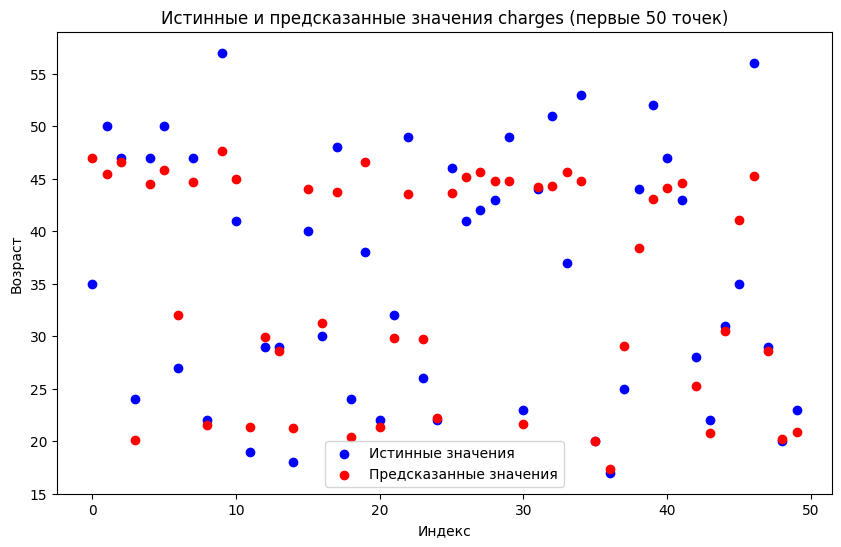

In [7]:
# Предобработка данных
target_column = 'Customer_Age'
X, y, preprocessor = ml.preprocess_data(data, target_column)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = ml.train_model(X_train, y_train)

# Предсказание на тестовых данных

y_pred = ml.predict(model, X_test)

# Оценка модели
mse, r2 = ml.evaluate_model(y_test, y_pred)

# Визуализация истинных и предсказанных значений
def plot_predictions(y_true, y_pred, num_points=50):
  plt.figure(figsize=(10, 6))
  plt.scatter(range(num_points), y_true[:num_points], color='blue', label='Истинные значения')
  plt.scatter(range(num_points), y_pred[:num_points], color='red', label='Предсказанные значения')
  plt.xlabel('Индекс')
  plt.ylabel('Возраст')
  plt.title(f'Истинные и предсказанные значения charges (первые {num_points} точек)')
  plt.legend()
  plt.show()

plot_predictions(y_test, y_pred)